<a href="https://colab.research.google.com/github/jrangelg/Artificial-intelligence/blob/main/construcci_n_de_black_scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONSTRUCCIÓN DEL MODELO DE BLACK SCHOLES

Se tienes dos activos

$$dR_t= \rho R_t$$ Activo en resta fija

$$dS_t = \mu S_t dt + \sigma S_t dB_t$$

Activo en renta variables

$$dS_t = \mu S_t dt + \sigma S_t dB_t$$
$$S_t := S_0 e^{(\mu-\frac{1}{2}\sigma^2)t + \sigma B_t}$$
Sobre un comportamiento monótono se hace la estimación de la media y de la volatilidad del activo sobre los retornos logarítmicos.

$$
u_t := log\left(\frac{S_t}{S_{t-1}}\right)
$$
$$
\hat \mu = \bar u / (\Delta t)
$$

$$
\hat \sigma = s_u/ (\Delta t)
$$

$$E(S_t):=S_0e^{\mu t}$$

$$d\Pi = r\Pi dt$$

$$\Pi = \Pi_0e^{rt}$$

## Finanzas cuantitativas

# Descom de la acción

$$
S_t = K+C_t-P_t
$$

# Estrategía sin interes

$$
C(S_t,T) - S_t = P(S_t,T)-K
$$

$$
Π(S_t,T) - S_t
$$

K: Precio inicial del activo Strike


$S_t$: Stock precio del activo en un tiempo fijo

$$
C_t:=(S_t-K)^+ = máx\{S_t-K,0\}
$$

$$
P_t:=(K-S_t)^+ = máx\{K-S_t,0\}
$$
# Contrato europeo, bajo renta fija
Límite de una sucesión binomial se tiene la exponencial
$$
\lim_{n \rightarrow \infty}(1+\frac{tr}{n})^n = e^{tr}
$$
$$
\lim_{n \rightarrow \infty}S_0(1+\frac{tr}{n})^n = S_0e^{tr}
$$
# Tasa de inetrés por unidad de tiempo
$$
C(S_t,T) - S_t = P(S_t,T)-Ke^{-r(T-t)}
$$

# Matriz de rendimiento



In [ ]:
import numpy as np

A=np.array([[20,60],[20,40]])
b=np.array([15,0])

In [ ]:
print(A)

[[20 60]
 [20 40]]


In [ ]:
np.linalg.inv(A) @ b

array([-1.5 ,  0.75])

# EC BLACK SCHOLES

La ecuación de Black-Scholes es un modelo matemático utilizado para calcular el precio teórico de las opciones financieras, especialmente las opciones europeas de compra (call) y venta (put). Desarrollada por Fischer Black, Myron Scholes y Robert Merton en 1973, esta ecuación se basa en la suposición de que el precio del activo subyacente sigue un proceso estocástico de difusión geométrica. La fórmula considera factores como el precio actual del activo subyacente, el precio de ejercicio de la opción, el tiempo hasta la madurez de la opción, la volatilidad del activo y la tasa de interés libre de riesgo. La ecuación de Black-Scholes ayuda a los inversionistas a valorar opciones y tomar decisiones informadas sobre la compra o venta de estos instrumentos financieros.

## Ecuaciones de Black-Scholes

La fórmula de Black-Scholes para una opción de compra (Call) es:

$$
C = S_0 \cdot N(d_1) - K \cdot e^{-rT} \cdot N(d_2)
$$

Y para una opción de venta (Put) es:

$$
P = K \cdot e^{-rT} \cdot N(-d_2) - S_0 \cdot N(-d_1)
$$

Donde:

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T}
$$

### Definiciones de las variables:

- \( C \): Precio de la opción de compra (Call)
- \( P \): Precio de la opción de venta (Put)
- \( S_0 \): Precio actual del activo subyacente
- \( K \): Precio de ejercicio de la opción
- \( T \): Tiempo hasta el vencimiento de la opción (en años)
- \( r \): Tasa de interés libre de riesgo anual
- \( \sigma \): Volatilidad del activo subyacente
- \( N(\cdot) \): Función de distribución acumulativa de la normal estándar


$$
dS_t := \mu S_t dt + \sigma S_t dW_t\\
dR_t := \rho R_t dt
$$
Estimar tres parámetros

# Implementación la fórmula de Black-Scholes para calcular el precio de una opción de compra (call) y una opción de venta (put):

In [ ]:
import math
from scipy.stats import norm

# Función de Black-Scholes para opción de compra (Call)
def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

# Función de Black-Scholes para opción de venta (Put)
def black_scholes_put(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    put_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Ejemplo de parámetros
S = 100     # Precio del activo subyacente
K = 95      # Precio de ejercicio
T = 1       # Tiempo hasta el vencimiento (en años)
r = 0.05    # Tasa de interés libre de riesgo
sigma = 0.2 # Volatilidad

# Calcular precios
call_option = black_scholes_call(S, K, T, r, sigma)
put_option = black_scholes_put(S, K, T, r, sigma)

# Imprimir resultados
print(f"El precio de la opción Call es: {call_option}")
print(f"El precio de la opción Put es: {put_option}")


El precio de la opción Call es: 13.346464945879582
El precio de la opción Put es: 3.713260273447414


$$f(x,y)\\
df(x,y)= \frac{df}{dx}dx +\frac{df}{dy}dy
$$

Combinación lineal de un activo de renta fija $R_t$ y un activo de recta variable con parámetros estimados $S_t$

Haciendo uso de la formula de Ito

$$V_t := \alpha R_t + \beta S_t\\
dV_t := \frac{dV}{dt}dt +\frac{dV}{dS}dS + \frac{1}{2}\frac{d^2V}{dS^2}dS^2\\
\Delta W_t \sim N(0, \Delta t)\\
dV_t := \frac{dV}{dt}dt + \mu S dt + \frac{1}{2}\frac{d^2V}{dS^2} \sigma^2 S^2 dt +\sigma S_t \frac{dV}{dS}dW\\
$$

Ecuación de Balck Scholes.

Modela el precio del contrato Call dados $\mu$, $\sigma$, $\rho$

$$
dV_t := \left(\frac{dV}{dt} + \mu S  + \frac{1}{2}\frac{d^2V}{dS^2} \sigma^2 S^2 \right)dt +\sigma S_t \frac{dV}{dS}dW
$$

$$\Pi = V(S,t) - \Delta S$$
$$d\Pi = dV(S,t) - \Delta S dS$$

$$
d\Pi := \left(\frac{dV}{dt} + \mu S  + \frac{1}{2}\frac{d^2V}{dS^2} \sigma^2 S^2 \right)dt +\sigma S_t \frac{dV}{dS}dW - \Delta \left(\mu S_t dt + \sigma S_t dW_t\right)
$$

$$
d\Pi := \left(\frac{dV}{dt} + \mu S  + \frac{1}{2}\frac{d^2V}{dS^2} \sigma^2 S^2 \right)dt +\sigma S_t \frac{dV}{dS}dW - \frac{dV}{dS} \left(\mu S_t dt + \sigma S_t dW_t\right)
$$

$$
d\Pi := \left(\frac{dV}{dt} +  \frac{1}{2}\frac{d^2V}{dS^2} \sigma^2 S^2 \right)dt
$$

$$
d\Pi = r\Pi dt
$$

$$\left(\frac{dV}{dt} +  \frac{1}{2}\frac{d^2V}{dS^2} \sigma^2 S^2 \right)dt  = r(V - \frac{dV}{dS}S)dt $$
$$
\frac{dV}{dt} +  \frac{1}{2}\frac{d^2V}{dS^2} \sigma^2 S^2  + r\frac{dV}{dS}S -rV = 0
$$

$\Pi = C - P$

# TALLER 1

## 1)
$$C = S exp(-D(T-t))N(d_1) - E exp(-r(T-t))N(d_2)$$
$$
\Delta = \frac{dC}{dS} = exp(-D(T-t))N(d_1)
$$

C(S_t,T) - S_t = P(S_t,T)-K

In [ ]:
C_t = \fra

The price of the call option is: 10.450583572185565


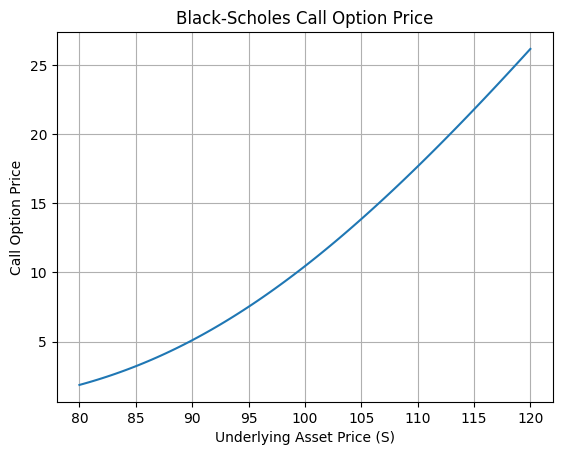

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma,contrato):
  """
  Calculate the price of a European call option using the Black-Scholes model.

  Args:
    S: Current price of the underlying asset.
    K: Strike price of the option.
    T: Time to maturity (in years).
    r: Risk-free interest rate.
    sigma: Volatility of the underlying asset.

  Returns:
    The price of the call option.
  """
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  if contrato == 'call':
      call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
  else:
      call_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
  return call_price

# Example usage
S = 100  # Current price of the underlying asset
K = 100  # Strike price of the option
T = 1    # Time to maturity (in years)
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Volatility of the underlying asset

call_price = black_scholes_call(S, K, T, r, sigma, "call")
print(f"The price of the call option is: {call_price}")

# Simulate the price of the call option
S_range = np.linspace(80, 120, 100)
call_prices = [black_scholes_call(s, K, T, r, sigma, "call") for s in S_range]

# Plot the price of the call option
plt.plot(S_range, call_prices)
plt.xlabel("Underlying Asset Price (S)")
plt.ylabel("Call Option Price")
plt.title("Black-Scholes Call Option Price")
plt.grid(True)
plt.show()

The price of the call option is: 5.573526022256971


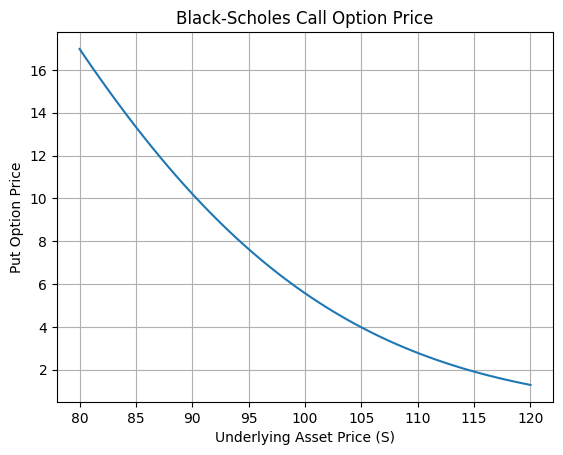

In [ ]:
call_price = black_scholes_call(S, K, T, r, sigma, "put")
print(f"The price of the call option is: {call_price}")

# Simulate the price of the call option
S_range = np.linspace(80, 120, 100)
call_prices = [black_scholes_call(s, K, T, r, sigma, "put") for s in S_range]

# Plot the price of the call option
plt.plot(S_range, call_prices)
plt.xlabel("Underlying Asset Price (S)")
plt.ylabel("Put Option Price")
plt.title("Black-Scholes Call Option Price")
plt.grid(True)
plt.show()